## Overview :

    Traumatic injury is the most common cause of death in the first four decades of life and a major public health problem around the world. There are estimated to be more than 5 million annual deaths worldwide from traumatic injury. Prompt and accurate diagnosis of traumatic injuries is crucial for initiating appropriate and timely interventions, which can significantly improve patient outcomes and survival rates. Computed tomography (CT) has become an indispensable tool in evaluating patients with suspected abdominal injuries due to its ability to provide detailed cross-sectional images of the abdomen.

    Abdominal trauma is among the most common types of traumatic injury, with the most frequent cause being motor vehicle accidents. Abdominal trauma may result in damage and internal bleeding of the internal organs, including the liver, spleen, kidneys, and bowel. Detection and classification of injuries are key to effective treatment and favorable outcomes. A large proportion of patients with abdominal trauma require urgent surgery. Abdominal trauma often cannot be diagnosed clinically by physical exam, patient symptoms, or laboratory tests.

    Prompt diagnosis of abdominal trauma using medical imaging is thus critical to patient care. AI tools that assist and expedite diagnosis of abdominal trauma have the potential to substantially improve patient care and health outcomes in the emergency setting.

## Why this project ?

    Well, Biodmedical imaging or Computed Tomography scans (CT Images) analysis are relevant and presente many specific challengies to work with I was not aware of. Below are the main challenges I faced:

    1. Specific medical image format : Biomedical imaging uses DICOM and NIFTI format. The main difference between these two formats is that the DICOM format has multiple 2D image slices which together form a 3D image, whereas the NIfTI format has only one file that contains the 3D image.


    2. Data annotation: Medical image data often requires expert annotation, which can be time-consuming and expensive. Additionally, there can be variations in annotation quality and consistency, which can affect the performance of the segmentation model.

    3. Data Ambiguity and complexity: Medical images can be complex and heterogeneous, with variations in image quality, resolution, and modality (Image variability). This can make it difficult to develop accurate, robust DL models and technics such as segmentation models to jsut name that.

    4. Model interpretability: Medical image segmentation models can be difficult to interpret, which can make it challenging to understand how the model is making its predictions.

    5. Training instability: Deep learning models can be sensitive to the choice of hyperparameters and the quality of the training data, which can lead to training instability and poor performance.

    6. Computational complexity: Large datasets and high-dimensional images require substantial computational resources and time.
    
    7. Data access: Medical image data is often subject to strict privacy regulations, which can make it difficult to access and use for research purposes.

    To overcome these challenges, it is important to carefully use appropriate preprocessing techniques, and carefully annotate the data, design and evaluate the segmentation model. Additionally, it is was necessary to use specialized tools and frameworks, such as DLTK, to enable image preprocessing, data visualization, deep learning on biomedical images and improve the performance of the model.


## Goal of the Project :

    First and foremost, this project aims to perform modern Biomedical imaging Analysis or Computed Tomography scans Analys.
    Thus, the second part will be focused on Machine Learning including Deep Learning and AI to identify several potential injuries in CT scans of trauma patients and help medical personnel detect injuries and grade their severity more quickly and precisely.
    Advanced algorithms for this purpose have the potential to enhance trauma care and patient outcomes globally. Any of these injuries can be fatal on a short time frame if untreated so there is great value in rapid diagnosis.

    It is worth saying that interpreting CT scans for abdominal trauma, however, can be a complex and time-consuming task, especially when multiple injuries or areas of subtle active bleeding are present. This challenge seeks to harness the power of artificial intelligence and machine learning to assist medical professionals in rapidly and precisely detecting injuries and grading their severity. The development of advanced algorithms for this purpose has the potential to improve trauma care and patient outcomes worldwide


## Approach :

    1. Data preprocessing

    2. EDA including data visualization prior to correct for noise under or over exposure.

    3. Data engineering, future extraction, splitting data & data augmentation.
        The following is the split ratio used for this project
        Training set (80%)
        Validation set (10%)
        Testing set (10%)
    
    4. Model 
        Definie the distributed training strategy.
        Definie the number of shared instances.
        Define a Deep Learning architecture to extract features from the model.
        Define parameters like the loss, optimizer, epochs, learning rate, and evaluation metric.
        Define checkpoints.
        run the model until an accuracy of at least 70% is obtained.
    
    5. Evaluate (choose the best model & evalaution metrics from the evalidation set).
    
    6. Use test set for final evaluation then save the model.
    
    6. Interprete the result.

In [1]:
# !pip install pydicom

In [2]:
# !pip install python-gdcm

In [3]:
# !pip install pylibjpeg pylibjpeg-libjpeg pydicom

In [4]:
# !pip install nibabel

In [5]:
# !pip install imageio

## Import Librairies & Dependencis

In [6]:
import sys
import warnings

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning)


In [7]:
# DATA MANIPULATION 
import numpy as np
import pandas as pd
import pandas.api.types
from scipy import stats

# DATA VISUALIZATION - PLOTS
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

# IMAGE PREPROCESSING & VISUALIZATION
import cv2
import os, shutil

import imageio
from PIL import *
import nibabel as nib
from pydicom import * # to process & visualize dicom CT Scans
from glob import glob
from tqdm import tqdm
from skimage.io import *
import SimpleITK as sitk # to process & visualize nifti CT scans
import pydicom as dicom # to process & visualize dicom CT Scans
from pathlib import Path # same like os.path
import nibabel as nb
from pydicom.data import *
import albumentations as A
from skimage import filters
import ipywidgets as widgets
from subprocess import check_output

In [8]:
# DEEP LEARNING LIBRAIRIES & DEPENDENCIES
import tensorflow as tf
import keras_cv
import keras_utils
import keras_core as keras

from keras import *
from keras_core import *
from keras.layers import *
from sklearn.utils import *
from keras.callbacks import *
from keras import backend as K
from keras.preprocessing import *
from sklearn.model_selection import *
from keras.preprocessing.image import *

# EVALUATION METRICS
from sklearn.model_selection import *
from sklearn.metrics import *

2023-09-21 01:24:26.064661: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-21 01:24:26.712626: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Using TensorFlow backend


## 1. DATA PROPROCESSING

In [9]:
# Set dataset root
dsroot ='/home/mukwa/Desktop/rsna-2023-abdominal-trauma-detection'

In [10]:
!ls {dsroot }

image_level_labels.csv	 test_images		   train_images
sample_submission.csv	 test_series_meta.csv	   train_series_meta.csv
segmentations		 train.csv
test_dicom_tags.parquet  train_dicom_tags.parquet


#### As per the result obtained above our main directory contains the following files :

    1. image_level_labels.csv - File in csv format*
    2. sample_submission.csv - File in csv format
    3. test_series_meta.csv - File in csv format
    4. train_series_meta.csv - File in csv format
    5. test_dicom_tags.parquet - File in parquet format
    6. train_dicom_tags.parquet - file parquet format
    
    Directory or Folders
        1. train_images
        2. test_images
        3. segmentations

In [11]:
for i in os.listdir(dsroot):
    if os.path.isdir(os.path.join(dsroot, i)):
        print(f'{i} - Directory')
    else:
        print(f'{i} - File')

train_series_meta.csv - File
sample_submission.csv - File
train.csv - File
train_images - Directory
train_dicom_tags.parquet - File
test_series_meta.csv - File
image_level_labels.csv - File
test_images - Directory
segmentations - Directory
test_dicom_tags.parquet - File


## 2. EDA

#### As per the result, we can conclude that we have six (6) and three directories

In [12]:
train_images = os.listdir(os.path.join(dsroot, 'train_images'))
print('Below is train_images :')
print(f'--> {train_images[0]}')
for dir in os.listdir(os.path.join(dsroot, f'train_images/{train_images[0]}')):
    print(f' --> {dir}')
    for img in os.listdir(os.path.join(dsroot, f'train_images/{train_images[0]}/{dir}'))[:15]:
        print(f' --> {img}')
print(' ... ')


Below is train_images :
--> 64263
 --> 40690
 --> 18.dcm
 --> 14.dcm
 --> 52.dcm
 --> 74.dcm
 --> 143.dcm
 --> 121.dcm
 --> 123.dcm
 --> 8.dcm
 --> 30.dcm
 --> 149.dcm
 --> 49.dcm
 --> 145.dcm
 --> 13.dcm
 --> 138.dcm
 --> 156.dcm
 --> 47672
 --> 189.dcm
 --> 200.dcm
 --> 52.dcm
 --> 74.dcm
 --> 143.dcm
 --> 121.dcm
 --> 123.dcm
 --> 195.dcm
 --> 149.dcm
 --> 174.dcm
 --> 145.dcm
 --> 138.dcm
 --> 156.dcm
 --> 219.dcm
 --> 122.dcm
 ... 


**As per our result, we can conclude the medical imaging or the CT (Computed tomography) scan data, in DICOM format of all patients stored into folders which may contain one or two differents sub-folders named by patient id becaus each patient may have been scanned once or twice. Each scan contains a series of images. In addition, it worth noting that all medical imaging does not have the same bit per pixel, pixel range, and pixel representation**. 

### LOAD & VIEW TRAIN CSV DATASET LABEL

In [13]:
train_labels = pd.read_csv(os.path.join(dsroot, 'train.csv'))
train_labels.shape

(3147, 15)

In [14]:
print('Training data Rows : %s Columns : %s ' % (str(train_labels.shape[0]),str(train_labels.shape[1])))

Training data Rows : 3147 Columns : 15 


In [15]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   patient_id             3147 non-null   int64
 1   bowel_healthy          3147 non-null   int64
 2   bowel_injury           3147 non-null   int64
 3   extravasation_healthy  3147 non-null   int64
 4   extravasation_injury   3147 non-null   int64
 5   kidney_healthy         3147 non-null   int64
 6   kidney_low             3147 non-null   int64
 7   kidney_high            3147 non-null   int64
 8   liver_healthy          3147 non-null   int64
 9   liver_low              3147 non-null   int64
 10  liver_high             3147 non-null   int64
 11  spleen_healthy         3147 non-null   int64
 12  spleen_low             3147 non-null   int64
 13  spleen_high            3147 non-null   int64
 14  any_injury             3147 non-null   int64
dtypes: int64(15)
memory usage: 368.9 KB


In [16]:
train_labels.head()

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1
1,10005,1,0,1,0,1,0,0,1,0,0,1,0,0,0
2,10007,1,0,1,0,1,0,0,1,0,0,1,0,0,0
3,10026,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,10051,1,0,1,0,1,0,0,1,0,0,0,1,0,1


In [17]:
# Show all duplicates in dataframe
train_labels.duplicated().sum() 

0

**Counting the unique patient ID for each patient and unique value for all injury types per category**.

In [18]:
# Counting the unique values for patient ID
train_labels.patient_id.nunique()

3147

In [19]:
# Counting the unique values for bowel injury
train_labels.bowel_injury.value_counts()

bowel_injury
0    3083
1      64
Name: count, dtype: int64

In [20]:
# Counting the unique values for extravasation injury
train_labels.extravasation_injury.value_counts()

extravasation_injury
0    2947
1     200
Name: count, dtype: int64

In [21]:
# Counting the unique values for kidney low injury
train_labels.kidney_low.value_counts()

kidney_low
0    3032
1     115
Name: count, dtype: int64

In [22]:
# Counting the unique values for kidney high injury
train_labels.kidney_high.value_counts()

kidney_high
0    3080
1      67
Name: count, dtype: int64

In [23]:
# Counting the unique values for liver low injury
train_labels.liver_low.value_counts()

liver_low
0    2888
1     259
Name: count, dtype: int64

In [24]:
# Counting the unique values for liver high injury
train_labels.liver_high.value_counts()

liver_high
0    3085
1      62
Name: count, dtype: int64

In [25]:
# Counting the unique values for spleen low injury
train_labels.spleen_low.value_counts()

spleen_low
0    2948
1     199
Name: count, dtype: int64

In [26]:
# Counting the unique values for spleen high injury
train_labels.spleen_high.value_counts()

spleen_high
0    2992
1     155
Name: count, dtype: int64

In [27]:
# Counting the unique values for any injury
train_labels.any_injury.value_counts()

any_injury
0    2292
1     855
Name: count, dtype: int64

#### LOAD & VIEW TRAIN SERIES META CSV DATASET

In [28]:
train_series_meta = pd.read_csv(os.path.join(dsroot, 'train_series_meta.csv'))
train_series_meta.shape

(4711, 4)

In [29]:
train_series_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patient_id        4711 non-null   int64  
 1   series_id         4711 non-null   int64  
 2   aortic_hu         4711 non-null   float64
 3   incomplete_organ  4711 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 147.3 KB


In [30]:
train_series_meta.head()

,patient_id,series_id,aortic_hu,incomplete_organ
0,10004,21057,146.00,0
1,10004,51033,454.75,0
2,10005,18667,187.00,0
3,10007,47578,329.00,0
4,10026,29700,327.00,0


In [31]:
# Show all duplicates in dataframe
train_series_meta.duplicated().sum() 

0

In [32]:
train_series_meta.pivot_table('patient_id', 'incomplete_organ',
                               aggfunc='count', margins =True, fill_value=0)

,patient_id
incomplete_organ,
0,4398
1,313
All,4711


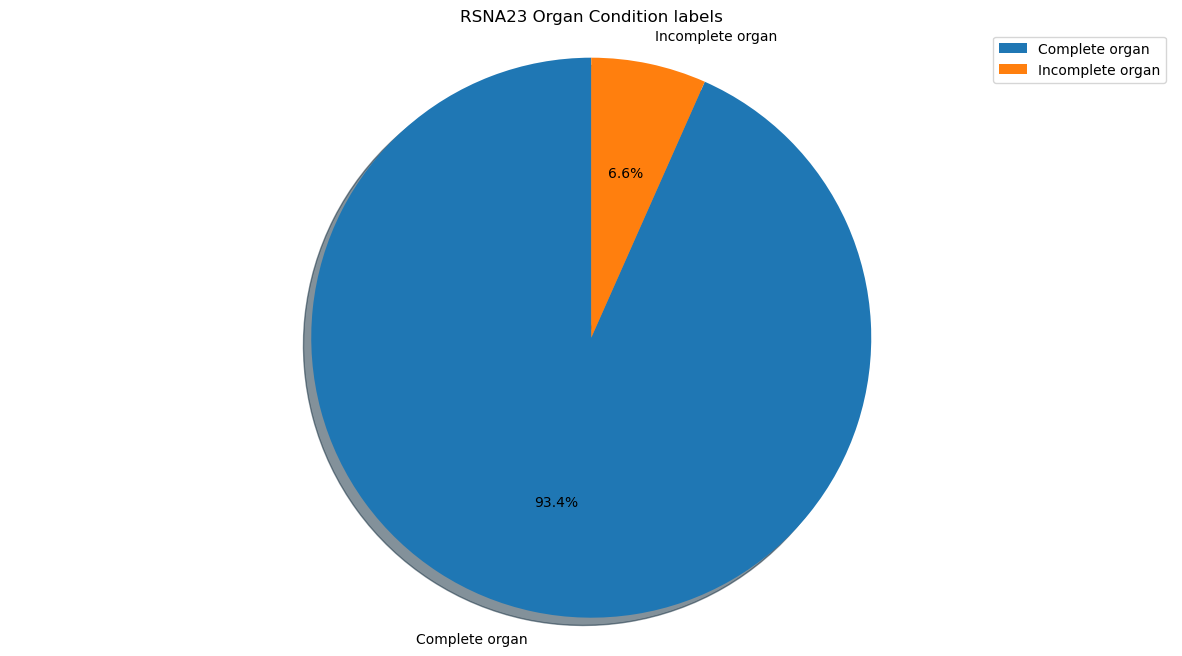

In [33]:
# Plot pie chart
labels = ['Complete organ', 'Incomplete organ']
sizes = train_series_meta.incomplete_organ.value_counts()

fig1, ax1 = plt.subplots(figsize=(15,8))
ax1.pie(sizes, labels = labels, autopct='%1.1f%%', shadow = True, startangle=90)
ax1.axis('equal')
ax1.legend()

plt.title('RSNA23 Organ Condition labels')
plt.show()

In [34]:
# Counting the unique values forpatient_id
train_series_meta['patient_id'].nunique()

3147

In [35]:
# Counting the unique values for series_id
train_series_meta['series_id'].nunique()

4711

In [36]:
# Counting the unique values for aortic_hu
train_series_meta['aortic_hu'].nunique()

717

In [37]:
# Counting the unique values forincomplete_organ
train_series_meta['incomplete_organ'].value_counts()

incomplete_organ
0    4398
1     313
Name: count, dtype: int64

#### train series meta dataset contain a total of:
    . 3,147 unique patient_id
    . 4,711 unique series id
    . 717 unique aortic_hu
    . 4398 unique complete organ & 313 incomplete organ
    
    

## LOAD TRAIN DICOM TAGS

In [38]:
train_dicom_tags = pd.read_parquet(os.path.join(dsroot, 'train_dicom_tags.parquet'))
train_dicom_tags.shape

(1510373, 35)

In [39]:
train_dicom_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510373 entries, 0 to 1510372
Data columns (total 35 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   BitsAllocated               1510373 non-null  int64  
 1   BitsStored                  1510373 non-null  int64  
 2   Columns                     1510373 non-null  int64  
 3   ContentDate                 1510373 non-null  object 
 4   ContentTime                 1510373 non-null  object 
 5   FrameOfReferenceUID         1510373 non-null  object 
 6   HighBit                     1510373 non-null  int64  
 7   ImageOrientationPatient     1510373 non-null  object 
 8   ImagePositionPatient        1510373 non-null  object 
 9   InstanceNumber              1510373 non-null  int64  
 10  KVP                         1510373 non-null  float64
 11  PatientID                   1510373 non-null  object 
 12  PatientPosition             1510373 non-null  object 
 1

In [40]:
train_dicom_tags.head()

,BitsAllocated,BitsStored,Columns,ContentDate,ContentTime,FrameOfReferenceUID,HighBit,ImageOrientationPatient,ImagePositionPatient,InstanceNumber,...,WindowCenter,WindowWidth,FileMetaInformationVersion,ImplementationClassUID,ImplementationVersionName,MediaStorageSOPClassUID,MediaStorageSOPInstanceUID,TransferSyntaxUID,path,RescaleType
0,16,16,512,20230722,003306.881589,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1459.20]",532,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.532,1.2.840.10008.1.2.5,train_images/49954/41479/532.dcm,nan
1,16,16,512,20230722,003303.279137,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1474.40]",513,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.513,1.2.840.10008.1.2.5,train_images/49954/41479/513.dcm,nan
2,16,16,512,20230722,003343.090736,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1310.40]",718,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.718,1.2.840.10008.1.2.5,train_images/49954/41479/718.dcm,nan
3,16,16,512,20230722,003252.960345,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1520.00]",456,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.456,1.2.840.10008.1.2.5,train_images/49954/41479/456.dcm,nan
4,16,16,512,20230722,003155.059398,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1756.00]",161,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.161,1.2.840.10008.1.2.5,train_images/49954/41479/161.dcm,nan


In [41]:
# Show all duplicates in dataframe
train_dicom_tags.duplicated().sum() 

0

In [42]:
# Counting the unique values for patient ID
train_dicom_tags['PatientID'].nunique()

3147

In [43]:
# Counting the unique values for StudyInstance UID
train_dicom_tags['StudyInstanceUID'].nunique()

3147

In [44]:
train_dicom_tags['PatientPosition'].nunique()

2

In [45]:
# Counting the unique values for Series Number
train_dicom_tags['SeriesNumber'].nunique()

134

In [46]:
# Counting the unique values for SeriesInstance UID
train_dicom_tags['SeriesInstanceUID'].nunique()

4771

In [47]:
train_dicom_tags['path'].nunique()

1510373

#### LOAD & VIEW IMAGE LEVEL LABEL

In [48]:
image_level_labels = pd.read_csv(os.path.join(dsroot, 'image_level_labels.csv'))
image_level_labels.shape

(12029, 4)

In [49]:
image_level_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12029 entries, 0 to 12028
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_id       12029 non-null  int64 
 1   series_id        12029 non-null  int64 
 2   instance_number  12029 non-null  int64 
 3   injury_name      12029 non-null  object
dtypes: int64(3), object(1)
memory usage: 376.0+ KB


In [50]:
image_level_labels.head()

,patient_id,series_id,instance_number,injury_name
0,10004,21057,362,Active_Extravasation
1,10004,21057,363,Active_Extravasation
2,10004,21057,364,Active_Extravasation
3,10004,21057,365,Active_Extravasation
4,10004,21057,366,Active_Extravasation


In [51]:
image_level_labels['injury_name'].nunique()

2

In [52]:
image_level_labels.pivot_table('patient_id', 'injury_name',
                               aggfunc='count', margins =True, fill_value=0)

,patient_id
injury_name,
Active_Extravasation,6370
Bowel,5659
All,12029


In [53]:
image_level_labels['patient_id'].nunique()

246

In [54]:
image_level_labels['series_id'].nunique()

330

In [55]:
image_level_labels['instance_number'].nunique()

925

**LOAD & VIEW SAMPLE SUBMISSION**

In [56]:
grp_patientid_by_seriesid =image_level_labels.groupby('patient_id')['series_id'].nunique().sum()

In [57]:
grp_patientid_by_seriesid

330

In [58]:
grp_patientid_by_instance =image_level_labels.groupby('patient_id')['instance_number'].nunique().sum()

In [59]:
grp_patientid_by_instance

10705

In [60]:
grp_seriesid_by_instance =image_level_labels.groupby('series_id')['instance_number'].nunique().sum()

In [61]:
grp_seriesid_by_instance

11536

In [62]:
sample_submission = pd.read_csv(os.path.join(dsroot, 'sample_submission.csv'))
sample_submission.shape

(3, 14)

In [63]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             3 non-null      int64  
 1   bowel_healthy          3 non-null      float64
 2   bowel_injury           3 non-null      float64
 3   extravasation_healthy  3 non-null      float64
 4   extravasation_injury   3 non-null      float64
 5   kidney_healthy         3 non-null      float64
 6   kidney_low             3 non-null      float64
 7   kidney_high            3 non-null      float64
 8   liver_healthy          3 non-null      float64
 9   liver_low              3 non-null      float64
 10  liver_high             3 non-null      float64
 11  spleen_healthy         3 non-null      float64
 12  spleen_low             3 non-null      float64
 13  spleen_high            3 non-null      float64
dtypes: float64(13), int64(1)
memory usage: 468.0 bytes


In [64]:
sample_submission.head()

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high
0,48843,0.5,0.5,0.5,0.5,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
1,50046,0.5,0.5,0.5,0.5,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
2,63706,0.5,0.5,0.5,0.5,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333


In [65]:
test_dicom_tags = pd.read_parquet(os.path.join(dsroot, 'test_dicom_tags.parquet'))
test_dicom_tags.shape

(3, 35)

In [66]:
test_dicom_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BitsAllocated               3 non-null      int64  
 1   BitsStored                  3 non-null      int64  
 2   Columns                     3 non-null      int64  
 3   ContentDate                 3 non-null      object 
 4   ContentTime                 3 non-null      object 
 5   FrameOfReferenceUID         3 non-null      object 
 6   HighBit                     3 non-null      int64  
 7   ImageOrientationPatient     3 non-null      object 
 8   ImagePositionPatient        3 non-null      object 
 9   InstanceNumber              3 non-null      int64  
 10  KVP                         3 non-null      float64
 11  PatientID                   3 non-null      object 
 12  PatientPosition             3 non-null      object 
 13  PhotometricInterpretation   3 non-null 

#### As shown above, test & the submission data has only three (3) observations or records.

**PREPROCESS TRAIN IMAGES**

In [67]:
import SimpleITK as sitk # for nifti files
import matplotlib.pyplot as plt

# Define the directory containing the medical images
ni_img_dir= os.path.join(dsroot, f'segmentations/')

# Get the list of image file names in the directory
image_files = os.listdir(ni_img_dir)
print('there are:', len(image_files))

there are: 206


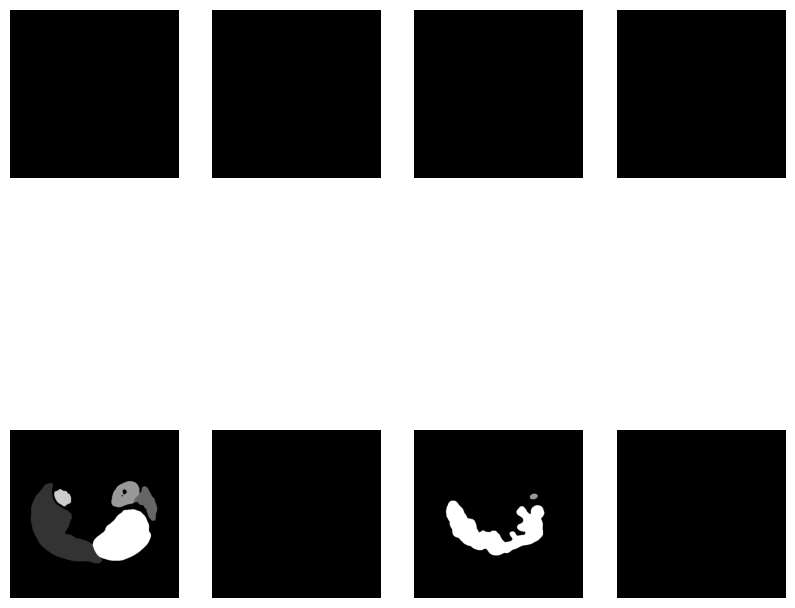

In [68]:
# Plot 8medical image using SimpleITK and Matplotlib
plt.figure(figsize=(10, 10))

for i in range(8):
    image_path = os.path.join(ni_img_dir, image_files[i])
    image = sitk.ReadImage(image_path)
    image_array = sitk.GetArrayFromImage(image)
    plt.subplot(2, 4, i+1)  # Create a 2x3 grid of subplots
    plt.imshow(image_array[0], cmap="gray")
    plt.axis("off")  # Optional: Remove the axis labels

plt.show()

**It worth noting some CT Scan images in nibabel format does not display body parts.It is difficult to accurately tell with CT scan because we loop into the directory containing imaging**

**Let's extract only 50 3D images out of 206 3D CT scan images stored in nibabel format**

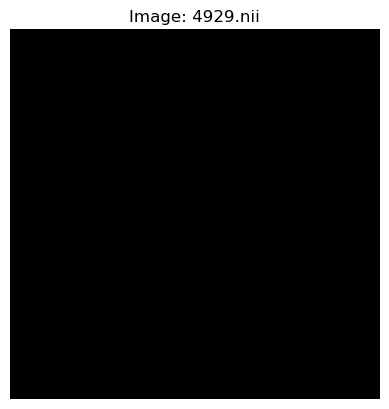

In [69]:
# Loop into the directory and break the loop at 50 CT scan images and display the fist one

for filename in os.listdir(ni_img_dir):
    if filename.endswith('.nii'):
        filepath = os.path.join(ni_img_dir, filename)
        img = nib.load(filepath)
        data = img.get_fdata()

        # Display the first slice of the image
        plt.imshow(data[:, :, 0], cmap='gray')
        plt.title(f"Image: {filename}")
        plt.axis('off')
        plt.show()

        # Stop after reading 50 images
        if len(os.listdir(ni_img_dir)) >= 50:
            break

------------

**For further and detailed information on that matter, it will be wise to talk to talk with a medical professional or consult a domain expert when working with medical images, as they can provide valuable insights and guidance**. 

------------

**TRAIN IMAGES DATASET**

In [70]:
# Let's count the number of Patient and Series in train_images 

# Define the directory path
img_src_dir =os.path.join(dsroot, 'train_images')

# Initialize the counters for files and subdirectories
file_count = 0
dir_count = 0

# Loop through the directory tree using os.walk()
for root, dirs, files in os.walk(img_src_dir):
    # Update the counters for files and subdirectories
    file_count += len(files)
    dir_count += len(dirs)

# Print the results
print(f"There are {file_count} files and {dir_count} subdirectories.")

There are 1501341 files and 7858 subdirectories.


**LET'S VISUALIZE SOME 2D CT SCANS**

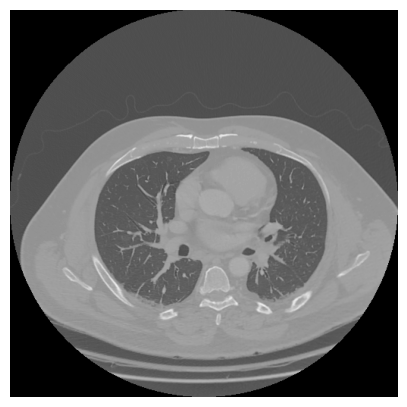

In [71]:
# Load the DICOM 2D image 229
im19 = dicom.dcmread(os.path.join(dsroot, f'train_images/19/14374/229.dcm'))

# Get the pixel data
im_pixel = im19.pixel_array

# Display the image
plt.figure(figsize=(5, 8))                      
plt.imshow(im_pixel, cmap=plt.cm.gray)

# Optional: Remove the axis labels
plt.axis('off')
# Plot images 229.dcm
plt.show()            

-----------

**As seen above, a single 2D image does not provide any detailed insight. It will be wise to retrieve more 2D images for this patient for better CT scan images analysis**

-----------------

gdcmconv: gdcm 3.0.22 $Date$


DICOM file contained compressed data. Autoconverting with gdcmconv (this warning is shown once for each directory)


gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$


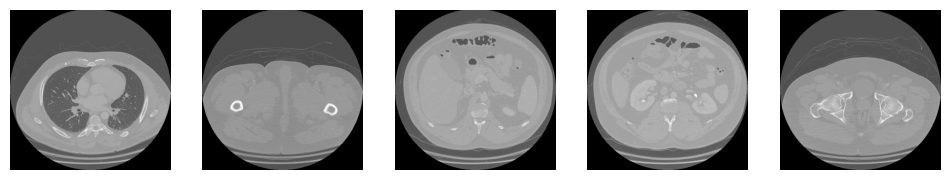

In [72]:
# Define the directory containing the medical images
img19_fpath = os.path.join(dsroot, f'train_images/19/14374')

# Get the list of image file names in the directory
image19_files = os.listdir(img19_fpath)

# Load and plot each image
plt.figure(figsize=(12, 12))

for i in range(5):
    image19_path = os.path.join(img19_fpath, image19_files[i])
    image19 = imageio.imread(image19_path)
    plt.subplot(1,5, i+1)  # Create a 2x3 grid of subplots
    plt.imshow(image19, cmap="gray")
    plt.axis("off")  # Optional: Remove the axis labels

plt.show()

DICOM file contained compressed data. Autoconverting with gdcmconv (this warning is shown once for each directory)


gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$


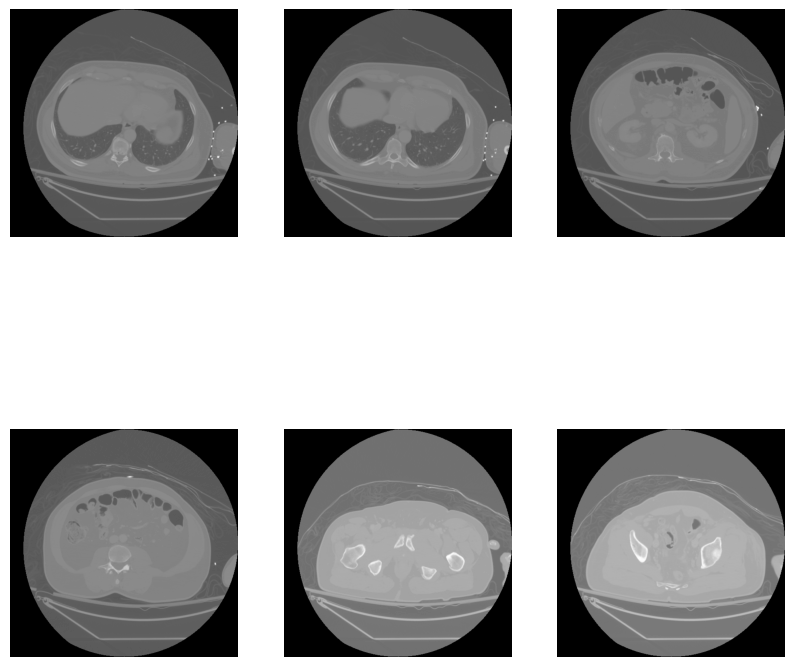

In [73]:
# Step 1: Define the directory containing the medical images
img_path = os.path.join(dsroot, f'train_images/64263/40690/')

# Step 2: Get the list of image file names in the directory
img_files = os.listdir(img_path)

# Step 3: Load and plot each image
plt.figure(figsize=(10, 10))

for i in range(6):
    image_fpath = os.path.join(img_path, img_files[i])
    image = imageio.imread(image_fpath)
    plt.subplot(2,3, i+1)  # Create a 2x3 grid of subplots
    plt.imshow(image, cmap="gray")
    plt.axis("off")  # Optional: Remove the axis labels

plt.show()

#### FILTERS:

**The aim of using filters is to help to visually modify or enhance image properties and identify different features present in an image like edges, as edges, corners, blobs, bends, etc**.

**This can help in understanding how filters modify or enhance image properties and extract valuable information from the pictures**.

gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$


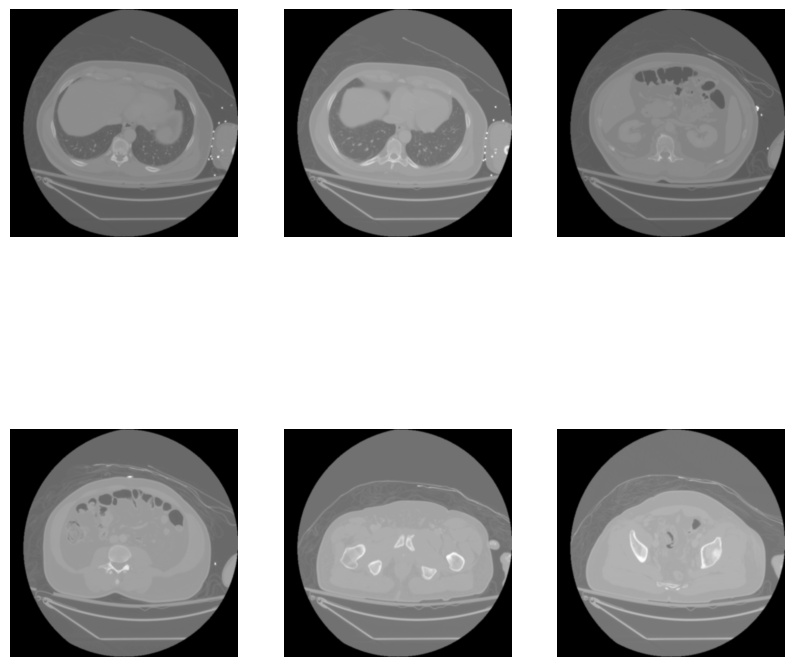

In [74]:
# Load, apply filter, and plot each image
plt.figure(figsize=(10, 10))

for i in range(6):
    im_fpath = os.path.join(img_path, img_files[i])
    image_filt = imageio.imread(im_fpath)
    
    # Apply a Gaussian filter with sigma=1
    filtered_image = filters.gaussian(image_filt, sigma=1)
    
    # Create a 2x3 grid of subplots
    plt.subplot(2, 3, i+1)
    plt.imshow(filtered_image, cmap="gray")
    
    # Optional: Remove the axis labels
    plt.axis("off")

**The visualization above 2D images (slices) only allows for a less detailed examination of each image but may not provide a comprehensive overview of the entire stacked 2D slices or all slices for the patient to dectect abdominal trauma**

DICOM file contained compressed data. Autoconverting with gdcmconv (this warning is shown once for each directory)


gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$


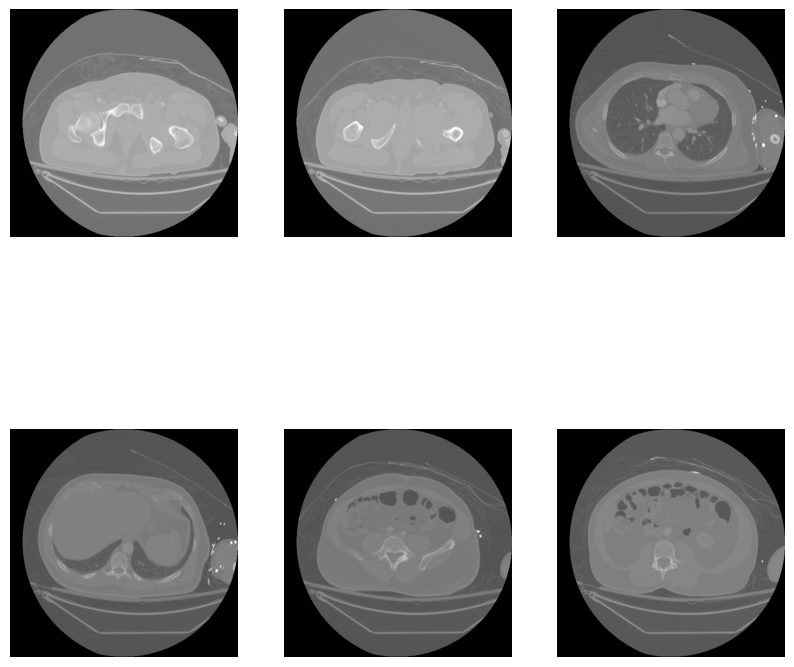

In [75]:
# Step 1: Define the directory containing the medical images
im_path = os.path.join(dsroot, f'train_images/64263/47672/')

# Step 2: Get the list of image file names in the directory
image_files = os.listdir(im_path)

# Step 3: Load and plot each image
plt.figure(figsize=(10, 10))

for i in range(6):
    image_path = os.path.join(im_path, image_files[i])
    image = imageio.imread(image_path)
    
    # Create a 2x3 grid of subplots
    plt.subplot(2,3, i+1)
    plt.imshow(image, cmap="gray")
    
    # Optional: Remove the axis labels
    plt.axis("off")

plt.show()

**APLLY GAUSSIAN FILTER**

gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$
gdcmconv: gdcm 3.0.22 $Date$


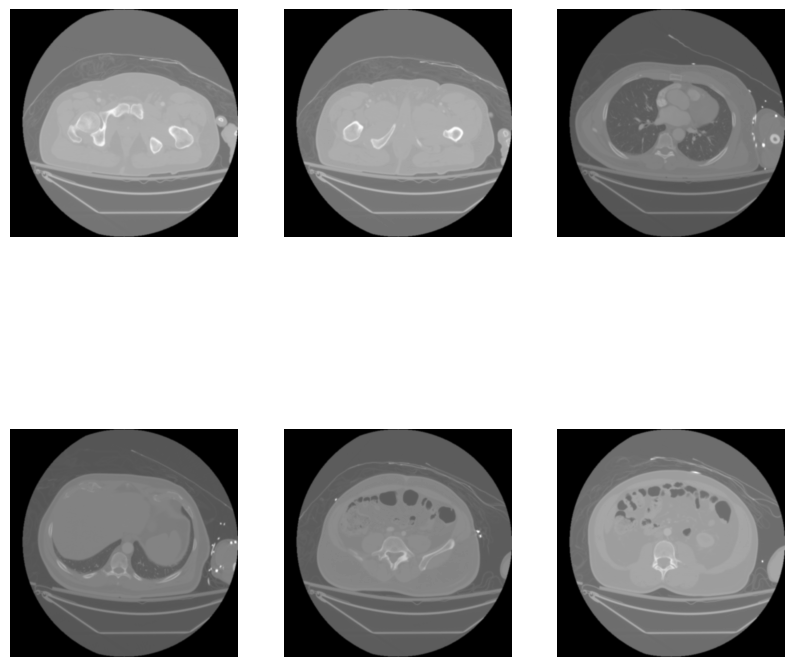

In [76]:
# Load, apply filter, and plot each image
plt.figure(figsize=(10, 10))

for i in range(6):
    im_fpath = os.path.join(im_path, image_files[i])
    image_filt = imageio.imread(im_fpath)
    
    # Apply a Gaussian filter with sigma=1
    filtered_image = filters.gaussian(image_filt, sigma=1)
    
    # Create a 2x3 grid of subplots
    plt.subplot(2, 3, i+1)
    plt.imshow(filtered_image, cmap="gray")
    
    # Optional: Remove the axis labels
    plt.axis("off")

--------------------------------

**As seen above, there are no inherent limitations to visualize only 2D images (slices) out of all slices for the patient. However,it is important to consider the context and purpose of the visualization. For example, if the goal is to compare the features of different images or regions, it may be necessary to visualize all images or a larger subset. In our case the 2D images we visualize don't provide any insights whatsover**. 

**Additionally, the specific 2D images that are chosen for visualization are not representative of the entire image  or dataset, leading to potential biases in the analysis or interpretation of the results**.

# BIOMMEDICAL IMAGE ANALYSIS

---------------------------------------

**Using stacked slices to extract other planes (Sagittal and Coronal) is really handy. Radiologists can also benefit from scrolling through many slices when diagnosing. However, in order to appropriately display the three planes (Axial, Sagital and Coronal) and scroll over slices, we, as AI engineers, must first comprehend the meaning of the various properties. These characteristics include sampling, shape, and aspect ratio**.

**Although there are many methods and libraries for analyzing biodemical or radiology images, for this project we will focus on imageio**

**It is worth noting that we are going to focus on the patient ID #19, serie_id #14374**


---------------

In [77]:
# Read the DICOM image using imageio.volread()
# Note: imageio.volread() can read a single file or a folder of files
image = imageio.volread(img19_fpath,'DICOM')

Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using d

Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using d

Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using d

Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using d

Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using d

Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 1/1346 files (0.1  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using d

Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE).

Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE).

Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE).

Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE).

Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE).

Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 442/1346 files (32.8%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE).

Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE).

Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE).

Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE).

Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE).

Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE).

Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.2%  The dicom reader can only read files with uncompressed image data - not '1.2.840.10008.1.2.5' (RLE). You can try using dcmtk or gdcm to convert the image.
Reading DICOM (examining files): 931/1346 files (69.21346/1346 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 291/673  (43.2593/673 

In [78]:
# image attributes
image.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2.1'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'),
      ('SOPInstanceUID', '1.2.123.12345.1.2.3.19.1.229'),
      ('ContentDate', '20230721'),
      ('ContentTime', '231217.173114 '),
      ('PatientID', '19'),
      ('StudyInstanceUID', '1.2.123.12345.1.2.3.19'),
      ('SeriesInstanceUID', '1.2.123.12345.1.2.3.19.14374'),
      ('SeriesNumber', 7),
      ('InstanceNumber', 229),
      ('ImagePositionPatient', (-228.0635, -221.2276, 1707.6)),
      ('ImageOrientationPatient', (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)),
      ('SamplesPerPixel', 1),
      ('Rows', 512),
      ('Columns', 512),
      ('PixelSpacing', (0.904, 0.904)),
      ('BitsAllocated', 16),
      ('BitsStored', 16),
      ('HighBit', 15),
      ('PixelRepresentation', 1),
      ('RescaleIntercept', 0.0),
      ('RescaleSlope', 1.0),
      ('PixelData', b'Deferred loading of pixel data'),
      ('shape', (673, 512, 512)),
      ('sampling', (0.7999999999999998, 0.904, 0.904

In [79]:
# The shape of the stacked images in each plane
# (Axial, Coronal, and Sagittal, respectively)
n0, n1, n2 = image.shape

# Print the ouput
print("Number of Slices:\n\t", "Axial=", n0, "Slices\n\t","Coronal=", n1, "Slices\n\t","Sagittal=", n2, "Slices")

Number of Slices:
	 Axial= 673 Slices
	 Coronal= 512 Slices
	 Sagittal= 512 Slices


In [80]:
# The sampling of the stacked images in each plane
# (Axial, Coronal, and Sagittal, respectively)
d0, d1, d2 = image.meta['sampling'] # in mm

# Print the output
print("Sampling:\n\t", "Axial=", d0, "mm\n\t","Coronal=", d1, "mm\n\t","Sagittal=", d2, "mm")

Sampling:
	 Axial= 0.7999999999999998 mm
	 Coronal= 0.904 mm
	 Sagittal= 0.904 mm


In [81]:
# The aspect ratio along the axial plane
axial_asp = d1/d2

# The aspect ratio along the sagittal plane
sagittal_asp = d0/d1

# The aspect ratio along the coronal plane
coronal_asp = d0/d2

# Print the output
print("Pixel Aspect Ratio:\n\t", "Axial=", axial_asp, "\n\t","Coronal=", coronal_asp, "\n\t","Sagittal=", sagittal_asp)

Pixel Aspect Ratio:
	 Axial= 1.0 
	 Coronal= 0.8849557522123892 
	 Sagittal= 0.8849557522123892


In [82]:
# Field of View
print("Field of View:\n\t", "Axial=", n0*d0, "mm\n\t","Coronal=", n1*d1, "mm\n\t","Sagittal=", n2*d2, "mm")

Field of View:
	 Axial= 538.3999999999999 mm
	 Coronal= 462.848 mm
	 Sagittal= 462.848 mm


In [83]:
# Add a slider that starts with 0 and ends at the number of
# slices along the axial plane, n0=673.
@widgets.interact(axial_slice=(0, n0-1))

# Define the function that shows the images of the specified slice number.
# It starts with the 10th slice. And you can scroll over any slice

# using the slider.
def axial_slicer(axial_slice=60):
  fig, ax = plt.subplots(1, 1, figsize=(8, 8))

  # Show the image of the specified slice number in 'gray' color-map
  # and axial aspect ratio
  ax.imshow(image[axial_slice,:,:], cmap='gray', aspect=axial_asp)
    
  # Don't show the axis
  ax.axis('off')  

interactive(children=(IntSlider(value=60, description='axial_slice', max=672), Output()), _dom_classes=('widge…

**LET'S VISUALIZE THE PATIENT WITH PATIEN ID #19 ALONG THE 3 PLANES**

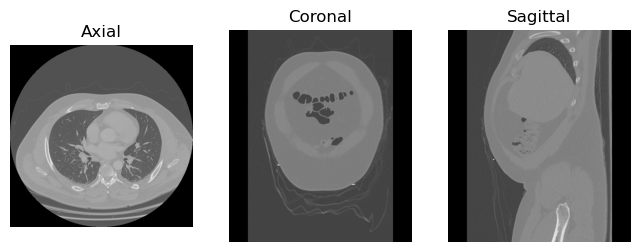

In [84]:
# the images along the three planes
# Define a figure with 1 row and 3 columns of plots to show
fig, ax = plt.subplots(1, 3, figsize=(8, 8))

# Axial Plane: show the 10th slice
ax[0].imshow(image[10,:,:], cmap='gray', aspect= axial_asp)
ax[0].axis('off')
ax[0].set_title('Axial')

# Coronal Plane: show the slice 100
ax[1].imshow(image[:,100,:],cmap='gray', aspect= coronal_asp)
ax[1].axis('off')
ax[1].set_title('Coronal')

# Sagittal Plane: show the slice 100
ax[2].imshow(image[:,:,100], cmap='gray', aspect= sagittal_asp)
ax[2].axis('off')
ax[2].set_title('Sagittal')
plt.show()

**LET'S VISUALIZE THE ENTIRE IMAGE FOR THE PATIENT WITH PATIENT ID #19 AND SERIE ID #14374**

In [85]:
# Add three sliders that start with 0 and ends at the number of slices
# along each plane.
# Axial:    n0=673   slice
# Corornal: n1=512  slice
# Sagittal: n2=512  slice

@widgets.interact(axial_slice=(0,n0-1), coronal_slice=(0,n1-1),sagittal_slice=(0,n2-1))

def slicer(axial_slice, coronal_slice, sagittal_slice=100):
  fig, ax = plt.subplots(1, 3, figsize=(12, 12))

  # Show the specfied slice on the axial plane with 'gray' color-map
  # and axial aspect ratio.
  ax[0].imshow(image[axial_slice,:,:], cmap='gray', aspect= axial_asp)
  ax[0].axis('off')
  ax[0].set_title('Axial')

  # Show the specified slice on the coronal plane with 'gray' color-map
  # and coronal aspect ratio.
  ax[1].imshow(image[:,coronal_slice,:],cmap='gray', aspect= coronal_asp)
  ax[1].axis('off')
  ax[1].set_title('Coronal')

  # Show the specified slice on the sagittal plane with 'gray' color-map
  # and sagittal aspect ratio.
  ax[2].imshow(image[:,:,sagittal_slice], cmap='gray', aspect= sagittal_asp)
  ax[2].axis('off')
  ax[2].set_title('Sagittal')
  

interactive(children=(IntSlider(value=336, description='axial_slice', max=672), IntSlider(value=255, descripti…

**In sum, it's worth noting that to visualize the extracted CT Scan images or region of interest, 3D images represent the entire CT Scan for the patient and will lead to accurate analysis or interpretation**

**Based on the result above, it is allowed to conclude to the main difference between visualizing only few 2D CT scan images instead out of all or 3D medical images in nibabel or dicom format is the amount of information that can be observed and compared.When visualizing a subset of the images, you may miss out on important patterns or variations that could be present in the full 3D CT scan image or a dataset**.

**it is important to consult with a medical professional or domain expert when working with medical images, as they can provide valuable insights and guidance on how to interpret and analyze the data. I will be more than happy to work with one of them**

In [86]:
train_paths = glob(f'{dsroot}/train_images/*/*/')

train_df = pd.DataFrame(train_paths, columns=["image_path"])
train_df['patient_id'] = train_df.image_path.map(lambda x: x.split('/')[-3]).astype(int)
train_df['series_id'] = train_df.image_path.map(lambda x: x.split('/')[-2]).astype(int)

print('train:')
print(f'# Size: {train_df.shape[0]}')

train:
# Size: 4711


In [87]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  4711 non-null   object
 1   patient_id  4711 non-null   int64 
 2   series_id   4711 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 110.5+ KB


In [88]:
train_df.head()

,image_path,patient_id,series_id
0,/home/mukwa/Desktop/rsna-2023-abdominal-trauma...,64263,40690
1,/home/mukwa/Desktop/rsna-2023-abdominal-trauma...,64263,47672
2,/home/mukwa/Desktop/rsna-2023-abdominal-trauma...,49517,63008
3,/home/mukwa/Desktop/rsna-2023-abdominal-trauma...,49517,26235
4,/home/mukwa/Desktop/rsna-2023-abdominal-trauma...,55920,40376


In [89]:
grouped_df = train_df.groupby(["patient_id", "series_id"])
index_df = pd.DataFrame([(patient_id, series_id) for (patient_id, series_id), 
                         group in grouped_df], columns=["patient_id", "series_id"])
index_df.head()

,patient_id,series_id
0,19,14374
1,26,18881
2,26,41997
3,33,55570
4,43,24055


In [90]:
index_df.shape

(4711, 2)

In [91]:
path_df = index_df.copy()
path_df["path"] = f"{dsroot}/train_images/" + path_df["patient_id"].astype(str) + "/" + path_df["series_id"].astype(str)
path_df = path_df.groupby('patient_id')['path'].agg(list).reset_index()

display(path_df.head())

,patient_id,path
0,19,[/home/mukwa/Desktop/rsna-2023-abdominal-traum...
1,26,[/home/mukwa/Desktop/rsna-2023-abdominal-traum...
2,33,[/home/mukwa/Desktop/rsna-2023-abdominal-traum...
3,43,[/home/mukwa/Desktop/rsna-2023-abdominal-traum...
4,96,[/home/mukwa/Desktop/rsna-2023-abdominal-traum...


In [92]:
path_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3147 non-null   int64 
 1   path        3147 non-null   object
dtypes: int64(1), object(1)
memory usage: 49.3+ KB


In [93]:
paths = path_df["path"].to_list()
paths[:10]

[['/home/mukwa/Desktop/rsna-2023-abdominal-trauma-detection/train_images/19/14374'],
 ['/home/mukwa/Desktop/rsna-2023-abdominal-trauma-detection/train_images/26/18881',
  '/home/mukwa/Desktop/rsna-2023-abdominal-trauma-detection/train_images/26/41997'],
 ['/home/mukwa/Desktop/rsna-2023-abdominal-trauma-detection/train_images/33/55570'],
 ['/home/mukwa/Desktop/rsna-2023-abdominal-trauma-detection/train_images/43/24055',
  '/home/mukwa/Desktop/rsna-2023-abdominal-trauma-detection/train_images/43/36714'],
 ['/home/mukwa/Desktop/rsna-2023-abdominal-trauma-detection/train_images/96/39874'],
 ['/home/mukwa/Desktop/rsna-2023-abdominal-trauma-detection/train_images/122/8218',
  '/home/mukwa/Desktop/rsna-2023-abdominal-trauma-detection/train_images/122/21217'],
 ['/home/mukwa/Desktop/rsna-2023-abdominal-trauma-detection/train_images/156/64005'],
 ['/home/mukwa/Desktop/rsna-2023-abdominal-trauma-detection/train_images/187/9748'],
 ['/home/mukwa/Desktop/rsna-2023-abdominal-trauma-detection/train_